# Fermion parity switches imprinted in the photonic field of cavity embedded Kitaev chains

In this notebook we plot Fig. 11 of the manuscript entitled ``[Fermion parity switches imprinted in the photonic field of cavity embedded Kitaev chains](https://arxiv.org/abs/2506.06237)""

In [1]:
import numpy as np
import h5py
import itertools
import matplotlib.pyplot as plt

from scipy.sparse import eye, bmat

In [2]:
def ph_numb_op(mx_Nph):

    ph_numb = 0*eye(int(2**(n_sites-1)))
    for n_ph in range(1,mx_Nph):
        ph_numb = bmat([[ph_numb,None],[None,n_ph*eye(int(2**(n_sites-1)))]])

    return ph_numb

In [3]:
def phn_av(E_ev,E_od,gnd_ev,gnd_od,Nph_coff):

    #print(N_phot.shape,ground_ev.shape)
    N_phot = ph_numb_op(Nph_coff)    

    if E_ev[0] <= E_od[0]:
        return np.dot(np.conj(gnd_ev[::]),N_phot.dot(gnd_ev[::]))
    else:
        return np.dot(np.conj(gnd_od[::]),N_phot.dot(gnd_od[::]))


In [4]:
def phn_av_arr(arrcomp,E_ev,E_od,gnd_ev,gnd_od,Nph_coff):

    #print(N_phot.shape,ground_ev.shape)

    N_phot = ph_numb_op(Nph_coff)
    
    evenodd = []

    for ii in range(len(arrcomp)):
        if E_ev[ii,0] <= E_od[ii,0]:
            evenodd.append(np.dot(np.conj(gnd_ev[ii,::]),N_phot.dot(gnd_ev[ii,::])))
        else:
            evenodd.append(np.dot(np.conj(gnd_od[ii,::]),N_phot.dot(gnd_od[ii,::])))

    return np.array(evenodd)

In [5]:
n_sites = 11
folroot = './data_convergence/'
flroot = 'EVecs_vs_mu_w0.3_g0.25_ns_11_'
flending = '.hdf5'
cutoff = [2,3,5,20]

root = 'EVecs_vs_phcutoff_mu0.75_w0.3'
ending = '_ns_'+str(n_sites)+'.hdf5'
freqs = [0.15,0.3]

arxiv = h5py.File(folroot+root+ending,'r')
Ncoff = arxiv.get('phcutoff')

names = [folroot+flroot+'Nphc'+str(nn)+flending  for nn in cutoff]

files = [h5py.File(name,'r') for name in names]

In [6]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size": "11.0"
})

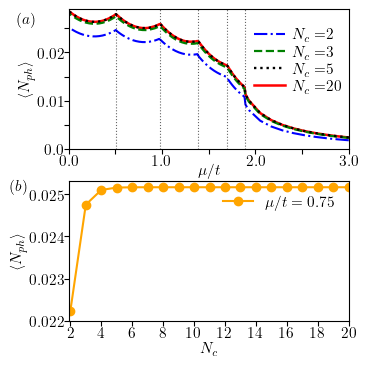

In [7]:
fig, sub = plt.subplots(2,1, figsize = (3.5,3.5))
clist = ['b','g','k','r']
lstyle = ['dashdot','dashed','dotted', 'solid']
lwidth = [1.5,1.6,1.7,1.8]
strlabl = [r'$2$',r'$3$',r'$5$',r'$20$']
disorderindx = [0,3,1,2]

n = n_sites
if n % 2 == 0:
    muroots = [2*np.sqrt(1-0.2**2)*np.cos(np.pi*pp/(n+1)) for pp in range(1,int(0.5*n)+1)]
else:
    muroots = [2*np.sqrt(1-0.2**2)*np.cos(np.pi*pp/(n+1)) for pp in range(1,int(0.5*(n-1))+1)]
    
for jj, ii in enumerate(disorderindx):
    
    arrcomp = files[ii].get('mu')
    array_ev = files[ii].get('E_mat_par_even')
    array_od = files[ii].get('E_mat_par_odd')
    ground_ev = files[ii].get('V_mat_par_even')
    ground_od = files[ii].get('V_mat_par_odd')

    ph_numb = phn_av_arr(arrcomp,array_ev,array_od,ground_ev[::,::,0],ground_od[::,::,0],cutoff[ii])
 
    sub[0].plot(arrcomp[::],ph_numb.real, label=r'$N_c=$'+strlabl[ii], ls=lstyle[ii], 
             color=clist[ii], lw=lwidth[ii])

handles, labels = sub[0].get_legend_handles_labels()
orderindx = [0, 2, 3, 1]

for murts in muroots:
    sub[0].plot(murts*np.ones(len(muroots)),np.linspace(-0.2,1.7,len(muroots)), ':k', 
                alpha=0.6, lw=0.8)

ph_numb = []
for Nc in Ncoff[::]:
    data_ev = arxiv.get('E_par_even_cutoff_'+str(Nc))
    data_odd = arxiv.get('E_par_odd_cutoff_'+str(Nc))    
    states_ev = arxiv.get('V_par_even_cutoff_'+str(Nc))
    states_odd = arxiv.get('V_par_odd_cutoff_'+str(Nc))
    
    ph_numb.append(phn_av(data_ev,data_odd,states_ev[::,0],states_odd[::,0],Nc))

ph_numb = np.array(ph_numb)
sub[1].plot(Ncoff[::],ph_numb.real, '-o', color='orange', label=r'$\mu/t=0.75$')

for ii in range(2):
    sub[ii].tick_params(axis='y', pad=0.2)
    sub[ii].tick_params(axis='x', pad=0.5)
    sub[ii].set_ylabel(r'$\langle N_{ph} \rangle$', rotation='vertical', labelpad=1.5, y=0.51)
    
sub[0].legend([handles[i] for i in orderindx], [labels[i] for i in orderindx], frameon=False,
              ncols=1, handlelength=2, loc=(0.64,0.35), handletextpad=0.5, labelspacing=0.2)

sub[0].set_ylim(0.0,0.029)
sub[0].set_yticks(np.linspace(0,0.025,6))
sub[0].set_yticklabels([r'$0.0$','',r'$0.01$','',r'$0.02$',''])
sub[0].set_xlabel(r'$\mu/t$', x=0.5, labelpad=-4.0)
sub[0].set_xlim(0.0,3.0)
sub[0].set_xticks(np.linspace(0,3,7))
sub[0].set_xticklabels([r'$0.0$','',r'$1.0$','',r'$2.0$','',r'$3.0$'])

sub[1].legend(frameon=False)
sub[1].set_xlim(1.9,20)
sub[1].set_xticks(np.linspace(2,20,10))
#sub[1].set_xticklabels([r'$2$','',r'$6$','',r'$10$','',r'$14$','',r'$18$',''])
sub[1].set_xlabel(r'$N_c$', labelpad=1)
sub[1].set_yticks(np.linspace(0.022,0.025,4))

sub[0].text(-0.55,0.026, r'$(a)$')
sub[1].text(-1.9,0.0251, r'$(b)$')

fig.subplots_adjust(left=0.17, right=0.97, hspace=0.23, top=0.99,bottom=0.099)
plt.savefig('ph_number_photon_coff.pdf')